## Variables

In [12]:
cluster_map_load_path = './' #Where to load the clusters map from
unpadded_lcs_load_path = './Light_Curves/' #Where the original unpadded light curves are stored
have_redshifts = True #You have a file called 'Redshift_Map.csv' with the ids and redshifts of each quasar
#NOTE: Without the redshift map, you can only plot the variability and structure functions, not z, luminosities or masses
redshifts_load_path = './' #Where is the redshifts table
dba = True #Whether to use dynamic barymetric average time warping to view average
save_figs = True #Whether to save figures
bins_sf = 5 #How many bins for the structure function
cluster_properties_color = '#1f77b4' #What color to plot the cluster properties
chosen_cluster = 12 #Which cluster for specific analysis
all_properties_dist = True #The Distribution Graphs to be made for all properties
the_property = 'z'#If you're just making one distribution graph, which one ('z','Fvar','Lum','Mass')
make_plot_for_all_clusters = False #Whether to make the corner plot for all clusters (SF will be implemented into all later)
figs_save_path = './' #Where to save the plots (Note that the program creates a folder called Plots in the directory)
have_science_plot = True #Will use science style for plot if true (Need scienceplots package also)

## Import Statement

In [9]:
from Visualizing_Clusters import load_cluster_map_and_unpadded_lcs,Plot_All_Clusters,Cluster_Properties_Comparison,\
                                Cluster_Properties,Structure_Function
import matplotlib.pyplot as plt
if have_science_plot:
    import scienceplots
    plt.style.use(['science','no-latex'])

## Visualizing the Clusters

### Loading the Clusters

In [10]:
cluster_map,quasar_ids,lcs,redshifts_map = load_cluster_map_and_unpadded_lcs(cluster_map_load_path,unpadded_lcs_load_path,\
                                                                                have_redshifts,redshifts_load_path)

Loading Light Curves


Loading Curves: 997it [00:15, 64.89it/s]

Loading Redshifts


### Creating the Plots

Plotting Averaged Clusters: 100%|██████████████████████████████████████████████████████| 16/16 [02:13<00:00,  8.32s/it]


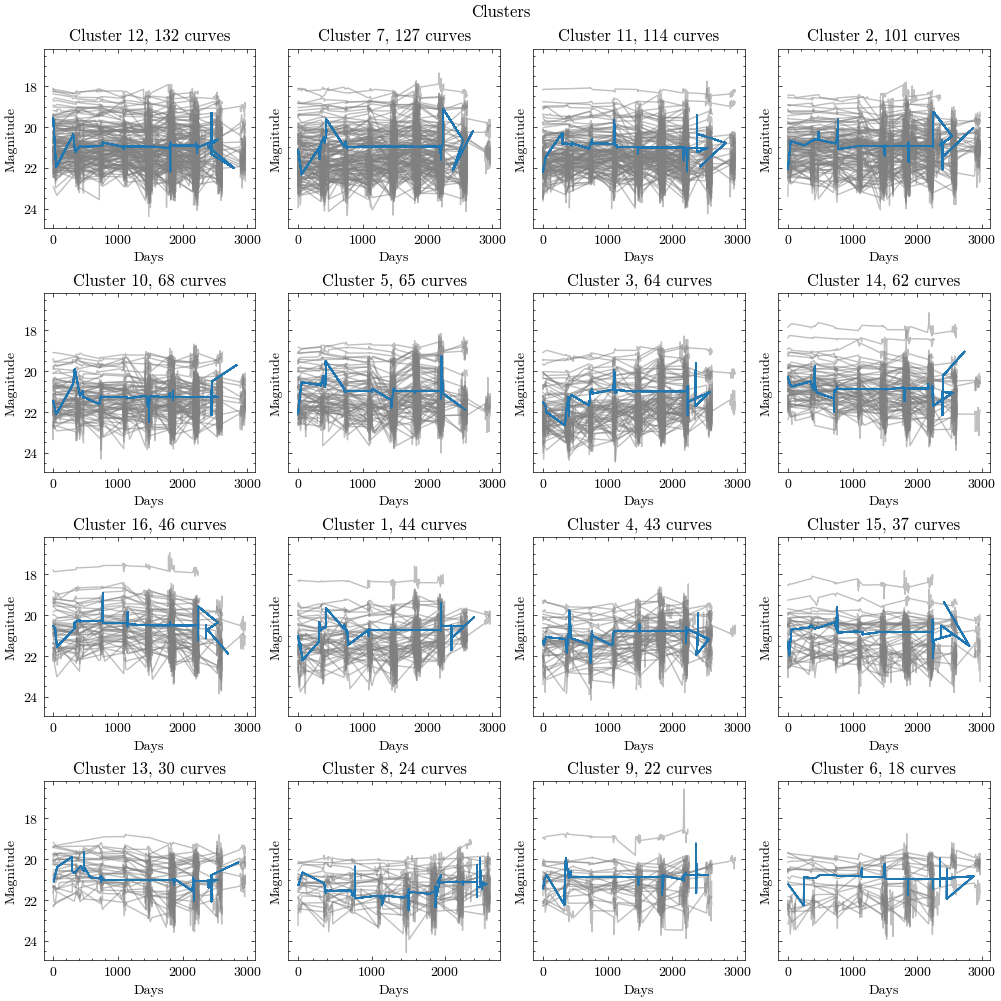

Plotting z Distribution: 100%|███████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.66it/s]
C:\Users\rajua\3rd Sem Masters\Thesis Research\Better_Scripted_Files\Visualizing_Clusters.py:146: RuntimeWarning: invalid value encountered in sqrt
  f_var = np.sqrt((s2-erm)/(np.mean(quasar["mag"])**2))
Plotting Mass Distribution: 100%|████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.75it/s]
C:\Users\rajua\3rd Sem Masters\Thesis Research\Better_Scripted_Files\Visualizing_Clusters.py:146: RuntimeWarning: invalid value encountered in sqrt
  f_var = np.sqrt((s2-erm)/(np.mean(quasar["mag"])**2))


Done..


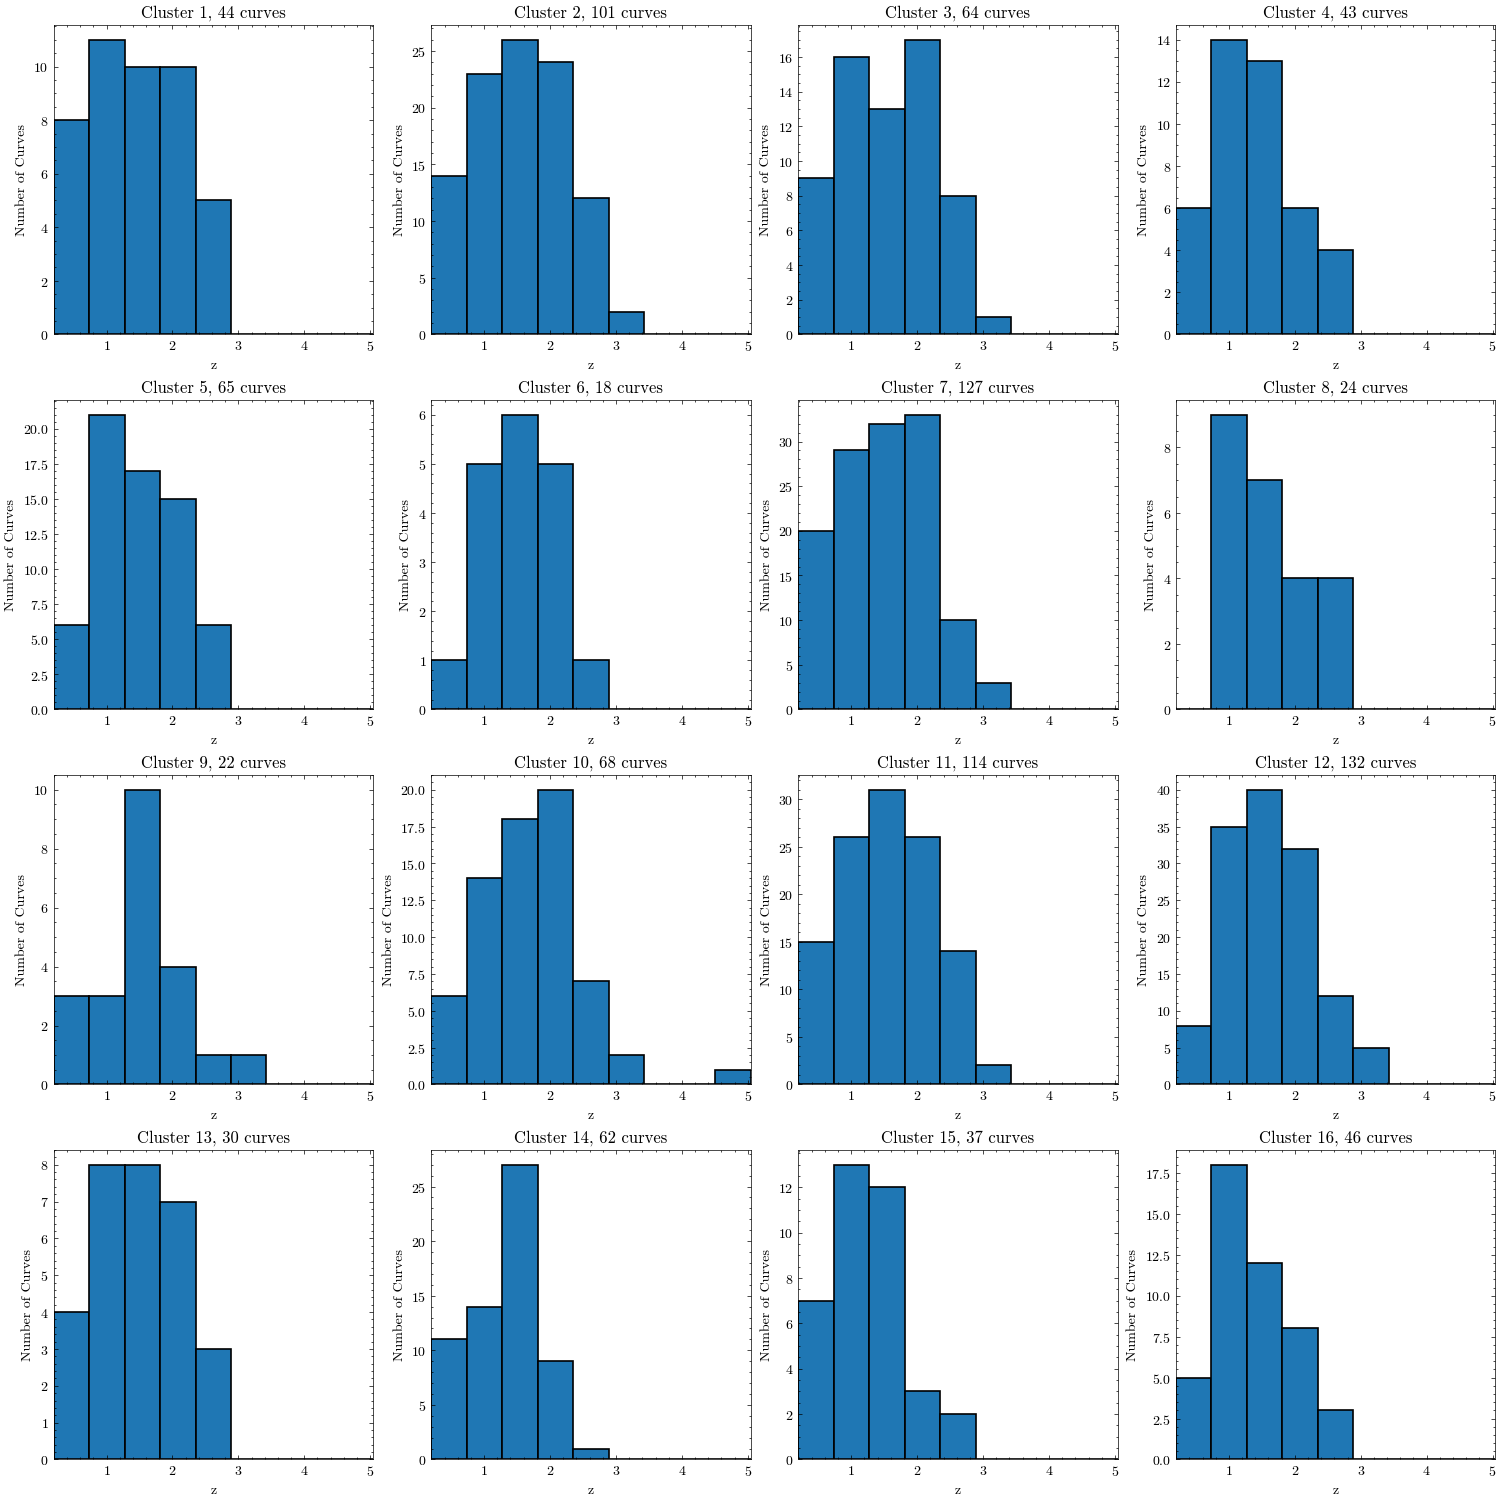

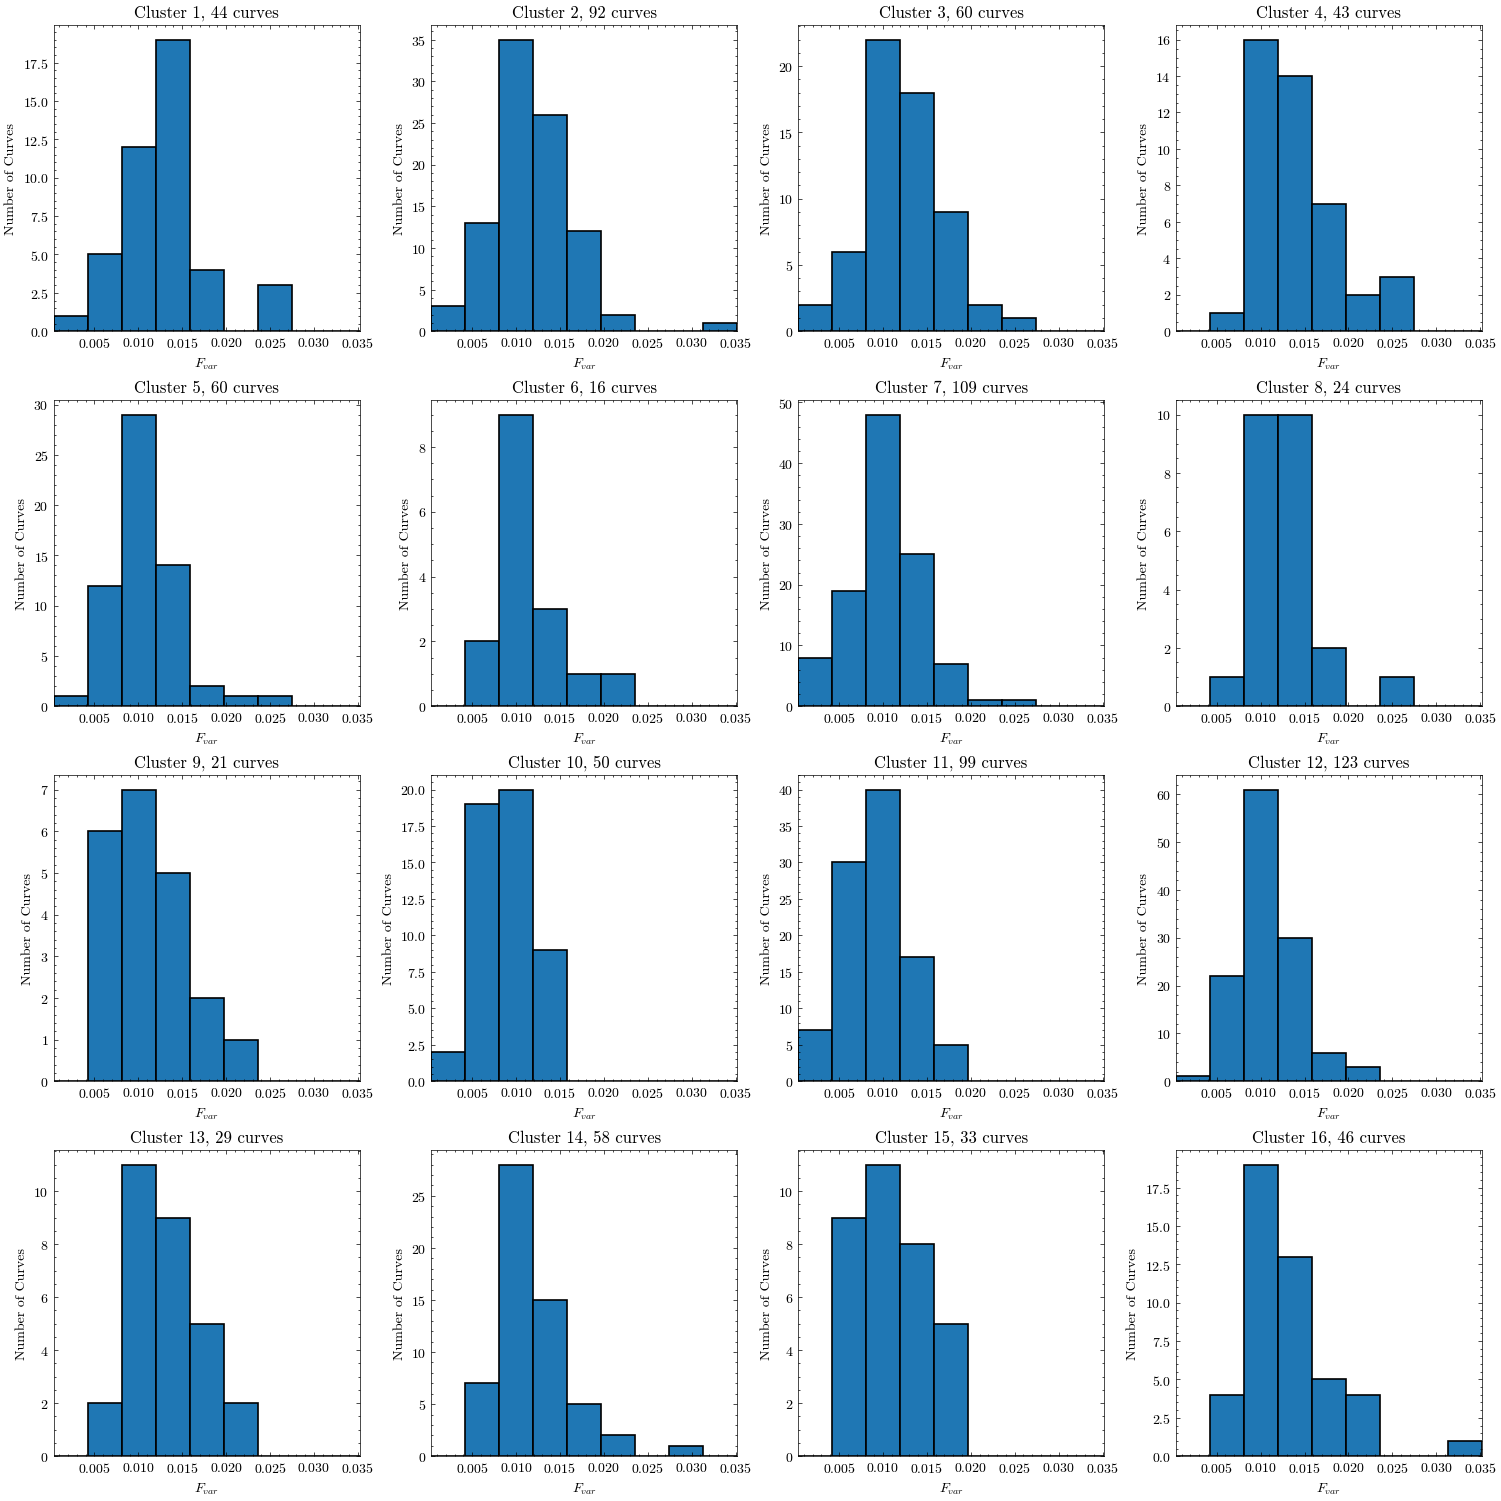

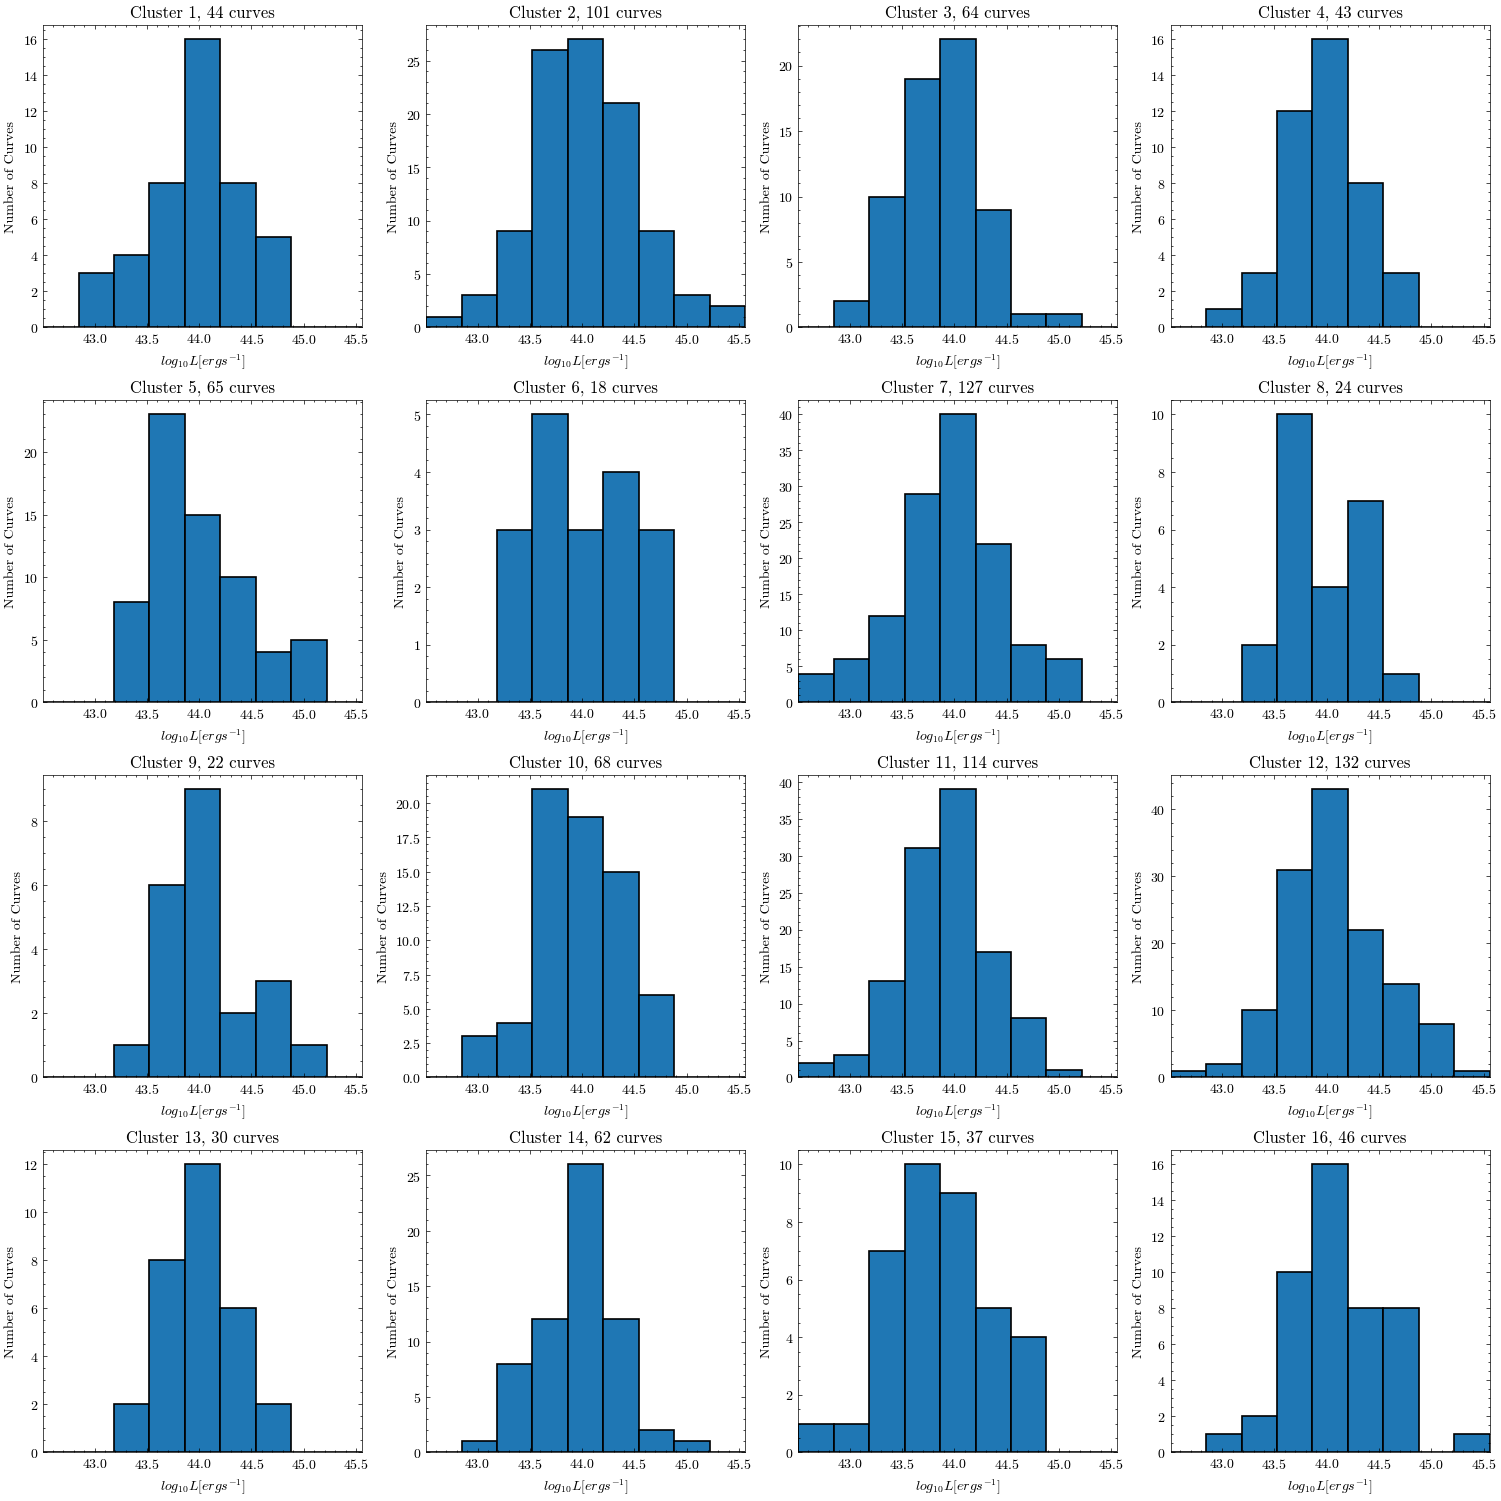

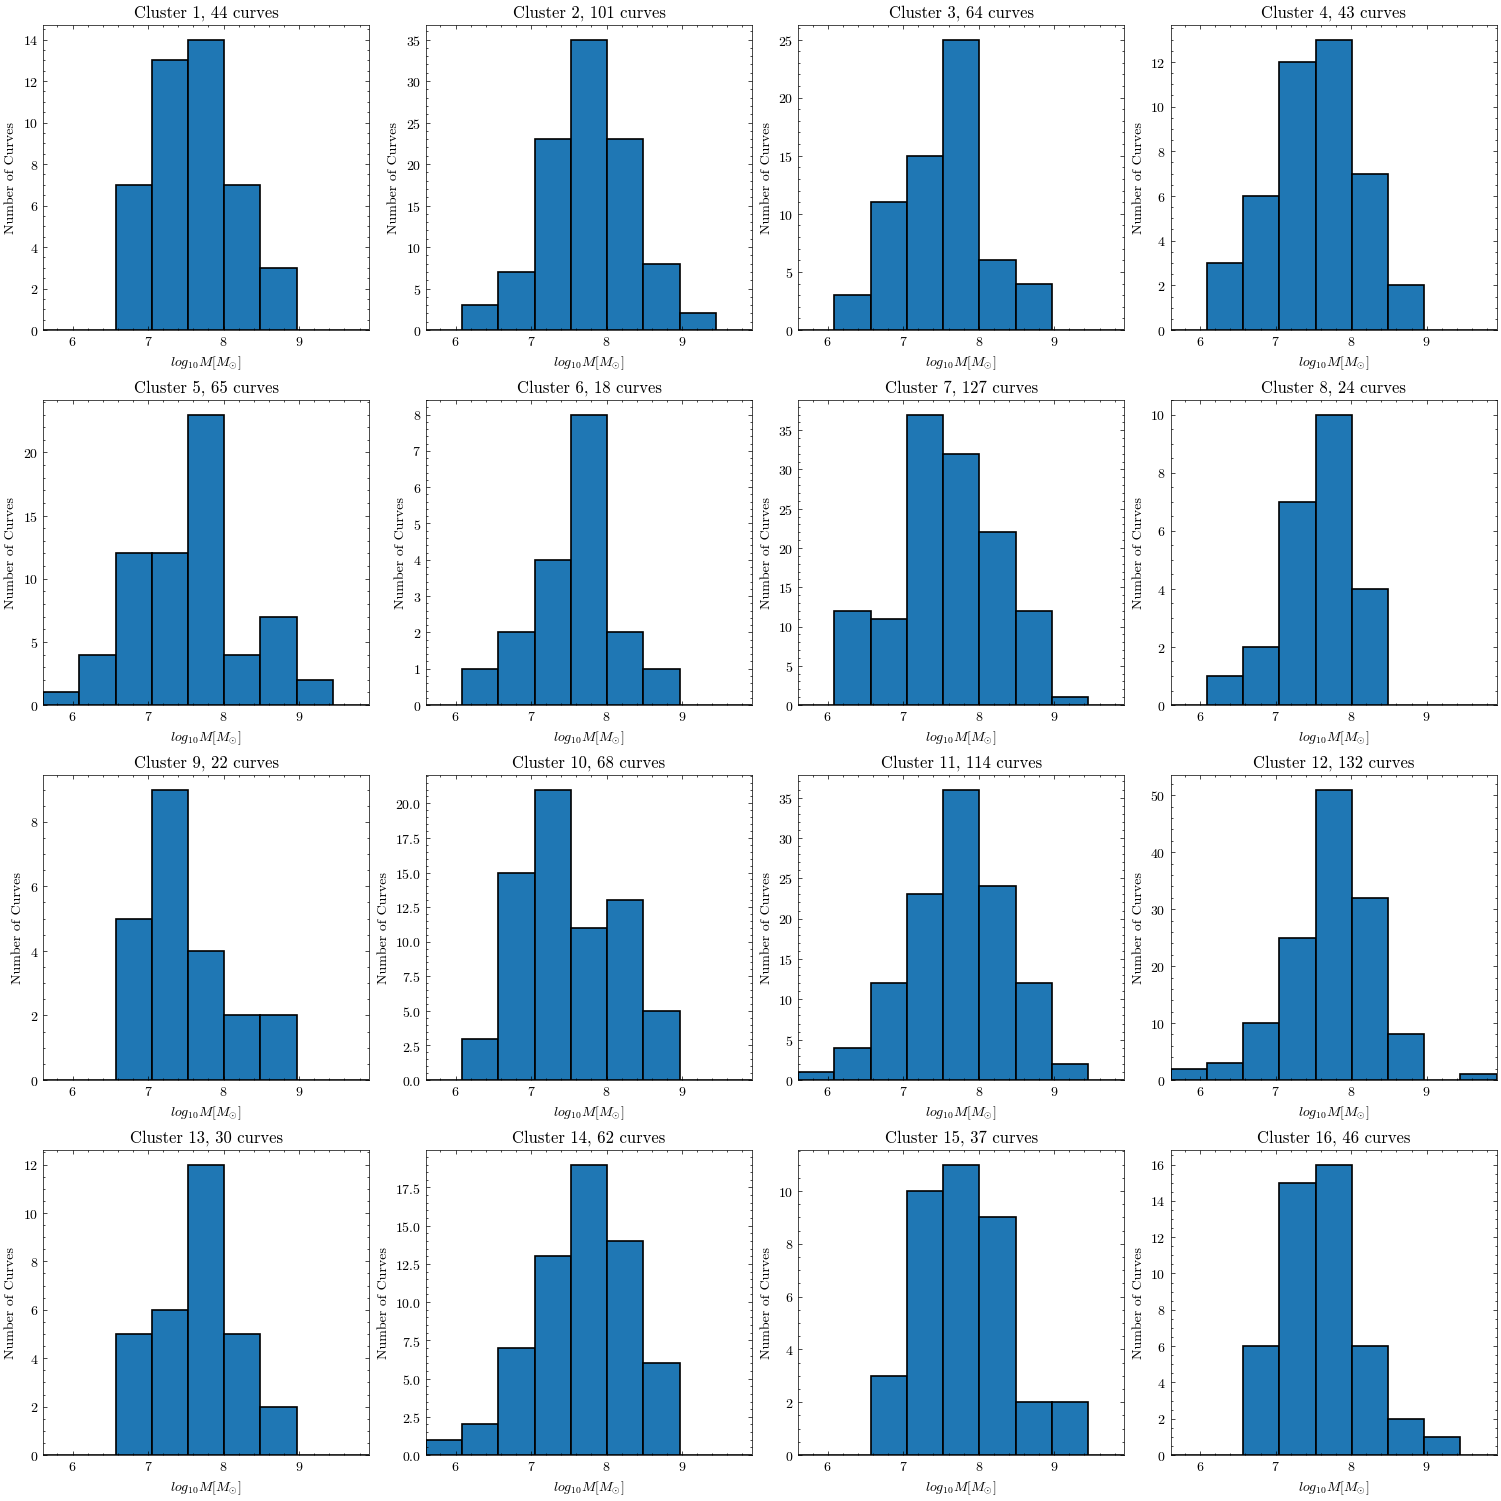

<Figure size 350x262.5 with 0 Axes>

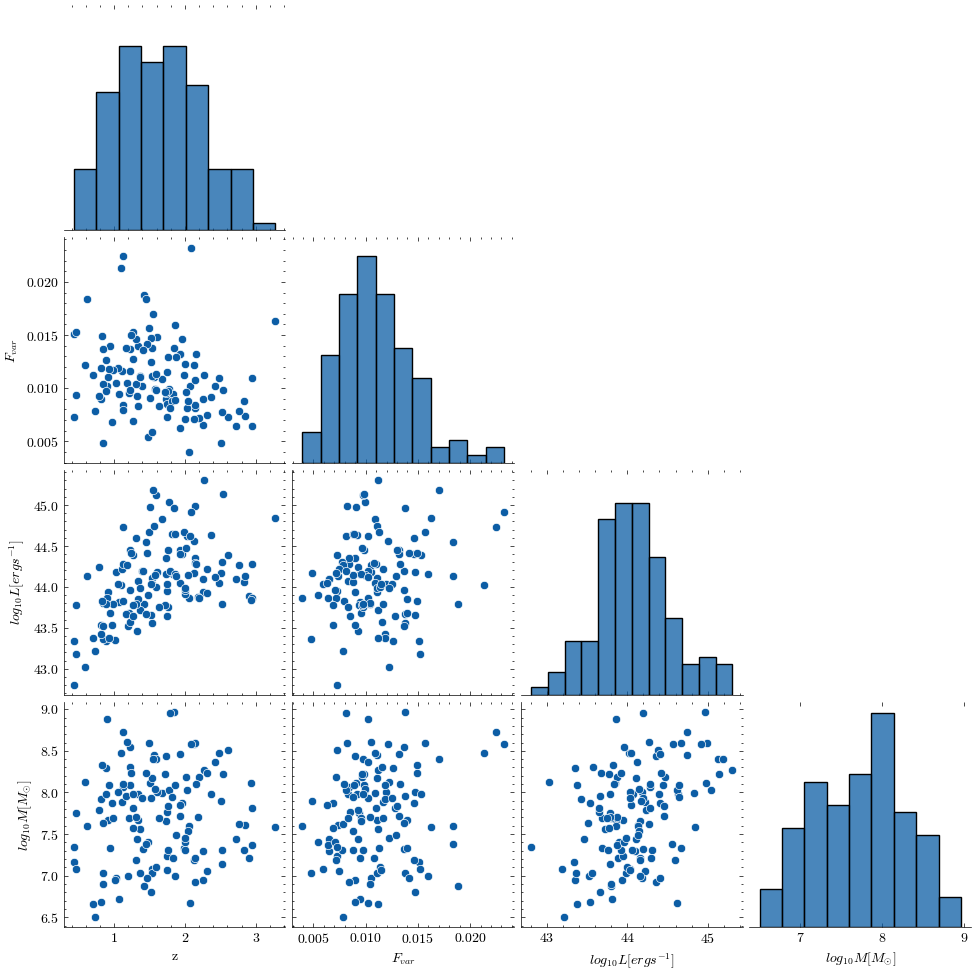

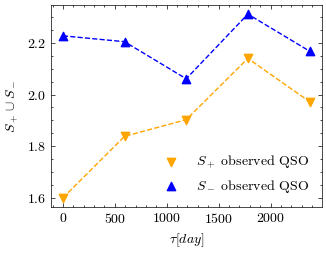

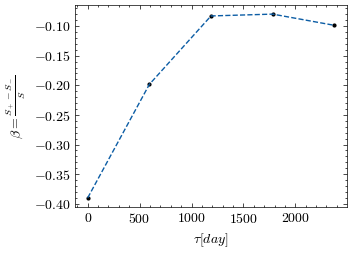

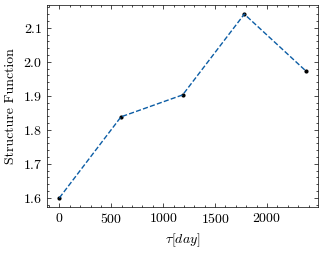

In [13]:
#Plotting all and the averaged light curves for each cluster
Plot_All_Clusters(cluster_map,lcs,dba = dba,save_figs = save_figs,figs_save_path=figs_save_path)
#Plotting the histogram of the property in all clusters
if all_properties_dist:
    for the_property in ['z','Fvar','Lum','Mass']:
        Cluster_Properties_Comparison(cluster_map,lcs,redshifts_map,the_property=the_property,color = cluster_properties_color,figs_save_path=figs_save_path)
else:
    Cluster_Properties_Comparison(cluster_map,lcs,redshifts_map,the_property=the_property,color = cluster_properties_color,figs_save_path=figs_save_path)
#Plots for the chosen cluster

#Plotting the cluster plots for all clusters or just one
if make_plot_for_all_clusters:
    for i in range(len(cluster_map.value_counts('Cluster'))):
        Cluster_Properties(cluster_map,i+1,lcs,redshifts_map,save_figs = save_figs,figs_save_path=figs_save_path)
else:
    Cluster_Properties(cluster_map,chosen_cluster,lcs,redshifts_map,save_figs = save_figs,figs_save_path=figs_save_path)   
#Plotting the Structure Function for one cluster
Structure_Function(cluster_map,chosen_cluster,lcs,bins = bins_sf,save_figs = save_figs,figs_save_path=figs_save_path)
print('Done..')